# Data Visualizations with Seaborn

In [1]:
# importing essential libraries
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

* Matplolib can not be used with DataFrame directly, but with seaborn we can do that.
* Seaborn uses matplotlib and useful to construct statistical visualization.
* One difference between seaborn and regular matplotlib plotting is that you can pass pandas DataFrames directly to the plot and refer to each column by name. 

* `sns.set()` reset everything

In [2]:
df = pd.read_csv('data/schoolimprovement2010grants.csv')

In [3]:
df.head()

,Unnamed: 0,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West
2,2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,449592,West
3,3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,Transformation,641184,West
4,4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,399686,West


<AxesSubplot:ylabel='Frequency'>

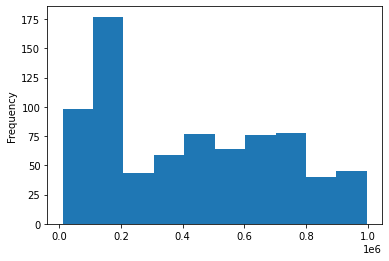

In [4]:
df['Award_Amount'].plot.hist()

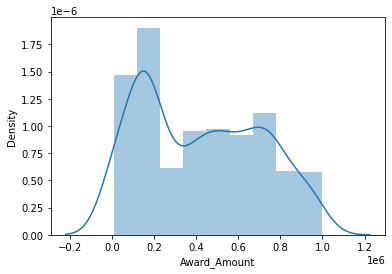

In [5]:
sns.distplot(df.Award_Amount);

* KDE is one way to estimate probability density function of the variable. In a KDE plot, you can think of each observation as replaced by a small ‘lump’ of area. Stacking these lumps all together produces the final density curve. The default settings use a normal-distribution kernel, but most software that can produce KDE plots also include other kernel function options.

<AxesSubplot:xlabel='Award_Amount'>

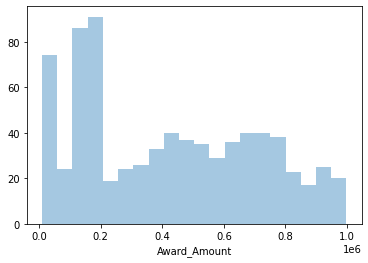

In [6]:
sns.distplot(df.Award_Amount, kde=False, bins=20)

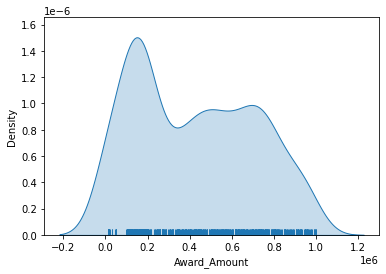

In [7]:
sns.distplot(df.Award_Amount, hist=False, rug=True, kde_kws={'shade':True});

* rug is small vertical tick at each observation.

<AxesSubplot:xlabel='Award_Amount'>

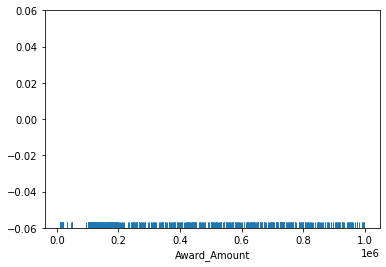

In [8]:
sns.rugplot(df.Award_Amount)

<AxesSubplot:xlabel='Award_Amount', ylabel='Density'>

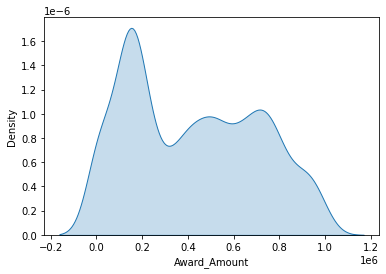

In [9]:
sns.kdeplot(df.Award_Amount, shade=True, bw=0.2) # bw = bandwidth controls how tightly fit to data. Shows width of kernel

* Smaller bw overfitted, larger bw smooth
* Nature of gaussian KDE mean estimate extends the largest and smallest value in dataset. To control we can use `cut`

<AxesSubplot:xlabel='Award_Amount', ylabel='Density'>

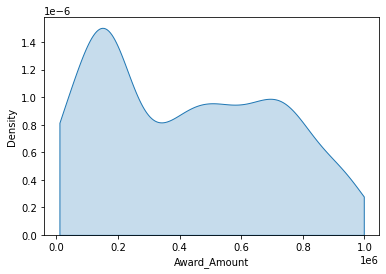

In [10]:
sns.kdeplot(df.Award_Amount, shade=True, cut=0)

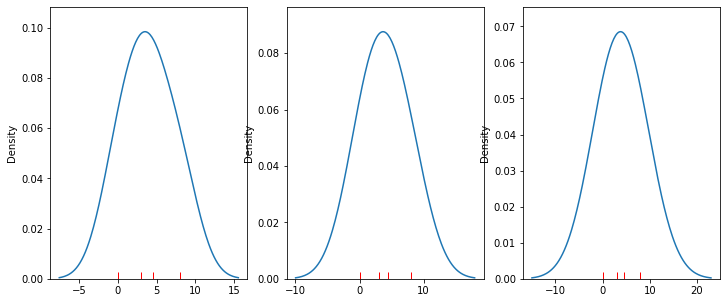

In [11]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sns.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sns.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sns.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'});

* The vertical axis indicates a density of data rather than straightforward proportions. Under a KDE plot, the total area between the 0-line and the curve will be 1. The probability of an outcome falling between two values is found by computing the area under the curve that falls between those values.
* If there are relatively few data points available, KDE provides a smooth estimate of the overall distribution of data. These ideas may not be so easily conveyed through histograms, in which the large discreteness of jumps may end up misleading.
* It should also be noted that there is a bandwidth parameter in KDE that specifies how wide the density lumps are. Similar to bin width for histograms, we need to choose a bandwidth size that best shows the signal in the data. A too-small bandwidth can make the data look noisier than it really is, and a too-large bandwidth can smooth out useful features that we could use to make inferences about the data.

In [12]:
x = np.random.gamma(6, size=200)
#sns.distplot(x,kde=False, fits=stats.gamma)

### Regression plot
* `regplot` function generates a scatter plot with a regression line. accepts x,y in numpy array, pandas series
* `lmplot` higher level, much more powerful. Accepts x and y in string "name", tidy format
* Sometime changing value in x makes drastic change in y, we can scale logarithmically to y, and suddenly relation between x and log(y) become linear and we can use x value to predict log(y).

In [13]:
df = pd.read_csv('data/insurance_premiums.csv')

In [14]:
df.head()

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West
3,Arkansas,22.4,18,26,94,95,827.34,142.39,South
4,California,12.0,35,28,91,89,878.41,165.63,West


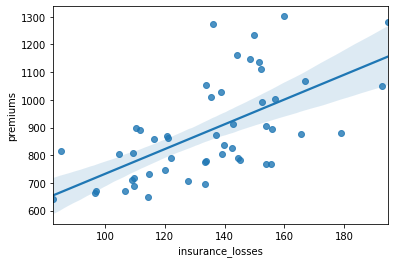

In [15]:
sns.regplot(data=df, x='insurance_losses', y='premiums');

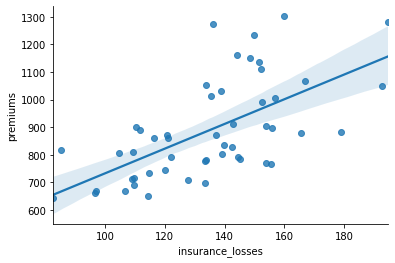

In [16]:
sns.regplot(data=df, x='insurance_losses', y='premiums')
sns.despine(); # By default remove right and top spines. left=True, bottom=True to remove others.

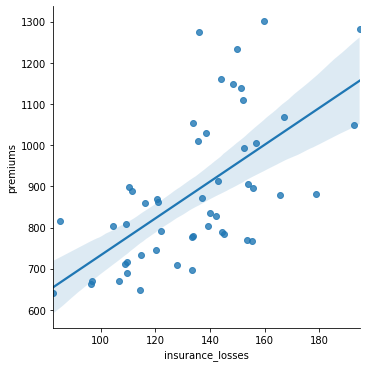

In [17]:
sns.lmplot(data=df, x='insurance_losses', y='premiums');

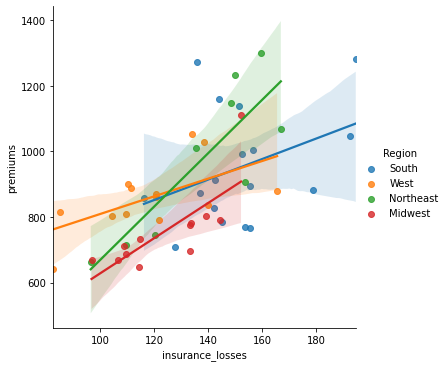

In [18]:
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           hue="Region")

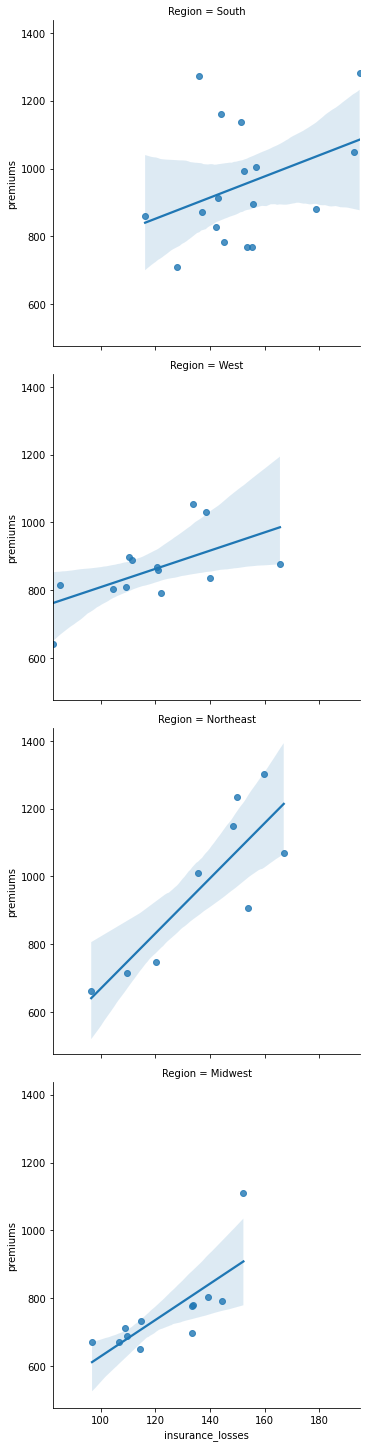

In [19]:
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           row="Region")

* in lmplot when y variable is binary we can pass `logistic=True` for logistic regression

<AxesSubplot:xlabel='insurance_losses', ylabel='premiums'>

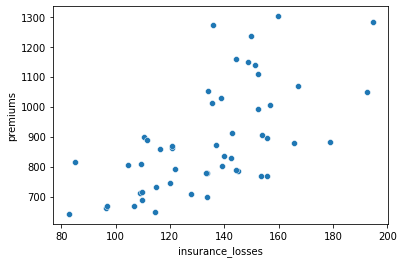

In [20]:
sns.scatterplot(data=df, x='insurance_losses', y='premiums')

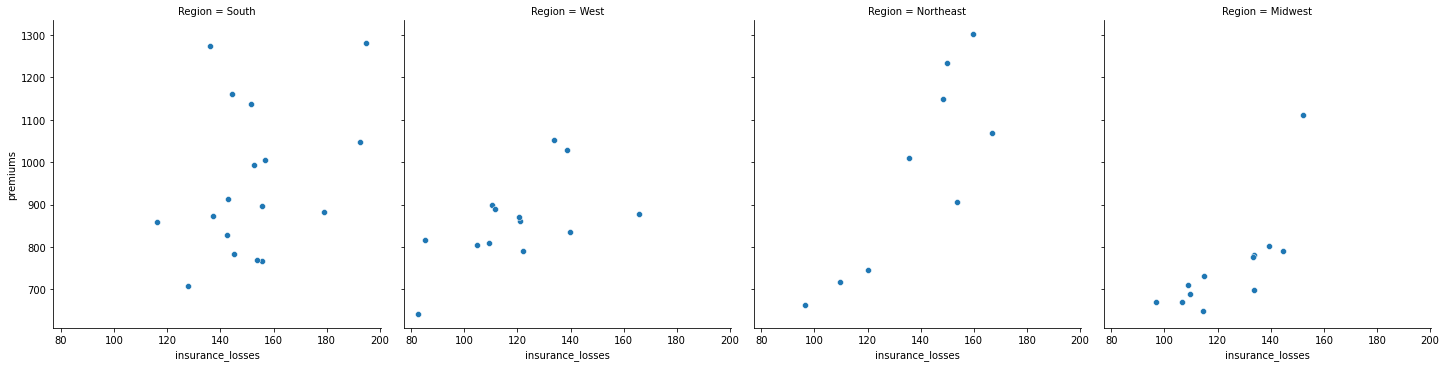

In [21]:
sns.relplot(data=df, x='insurance_losses', y='premiums', kind='scatter', col='Region')

#### scatterplot vs relplot
* relplot let's create subplot in figure using col and/or row arguments.

* we can set seaborn style for pandas and matplotlib with  `sns.set()`
* `sns.set_style('dark')` will set dark style, other styles are 'white', 'dark', 'whitegrid', 'darkgrid', 'ticks'
    - darkgrid: Coordinate grid displayed, dark background color (default style)
    - whitegrid: Coordinate grid displayed, white background color
    - dark: Coordinate grid hidden, dark background color
    - white: Coordinate grid hidden, white background color
    - ticks: Coordinate grid hidden, white background color, ticks visible
* Setting `sns.set(color_codes=True)` will allow to use matplotlib color pallate, and it will map to sns colors. Now we can pass `color` parameter to any plot of seaborn.
* `set_palette()` is used to define a palette

* `sns.set_context()` define scale of image. It can be "paper", "notebook", "talk", "poster"

In [22]:
sns.palettes.SEABORN_PALETTES

{'deep': ['#4C72B0',
  '#DD8452',
  '#55A868',
  '#C44E52',
  '#8172B3',
  '#937860',
  '#DA8BC3',
  '#8C8C8C',
  '#CCB974',
  '#64B5CD'],
 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'],
 'muted': ['#4878D0',
  '#EE854A',
  '#6ACC64',
  '#D65F5F',
  '#956CB4',
  '#8C613C',
  '#DC7EC0',
  '#797979',
  '#D5BB67',
  '#82C6E2'],
 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'],
 'pastel': ['#A1C9F4',
  '#FFB482',
  '#8DE5A1',
  '#FF9F9B',
  '#D0BBFF',
  '#DEBB9B',
  '#FAB0E4',
  '#CFCFCF',
  '#FFFEA3',
  '#B9F2F0'],
 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'],
 'bright': ['#023EFF',
  '#FF7C00',
  '#1AC938',
  '#E8000B',
  '#8B2BE2',
  '#9F4800',
  '#F14CC1',
  '#A3A3A3',
  '#FFC400',
  '#00D7FF'],
 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'],
 'dark': ['#001C7F',
  '#B1400D',
  '#12711C',
  '#8C0800',
  '#591E71',
  '#592F0D',
  '#A23582',
  '#3C3C3C',
  '#B8850A

* `sns.palplot()` display palette
* `sns.color_palette()` returns current palette.

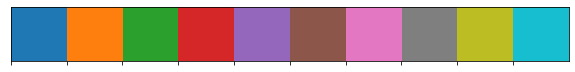

In [23]:
sns.palplot(sns.color_palette())

In [24]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

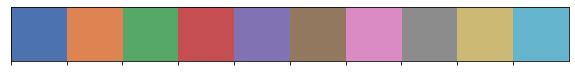

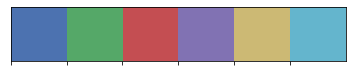

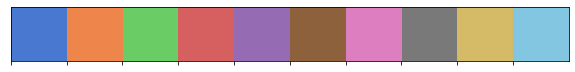

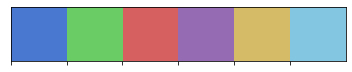

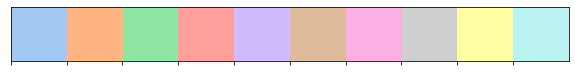

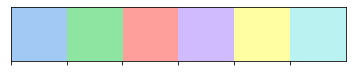

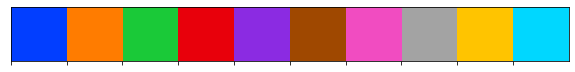

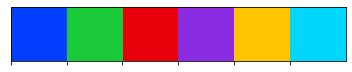

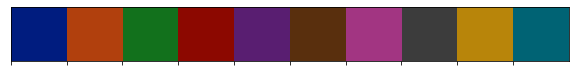

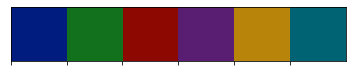

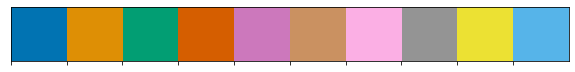

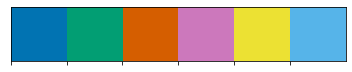

In [25]:
for p in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(p)
    sns.palplot(sns.color_palette())

* Circular colors: When data is not ordered.
    - Best to distinguish chunks of data that do not have inherent ordering.
`sns.palplot(sns.color_palette("Paired", 12))`

* Sequential colors = when the data has a consistent range from high to low
`sns.palplot(sns.color_palette("Blues", 12))`

* Diverging colors = when both the low and high values are interesting. Well defined mid point in data. Ex. plotting change in temperature from baseline.
`sns.palplot(sns.color_palette("BrBG", 12))`
* `_r` suffix will reverse ramp `_d` for dark palette.

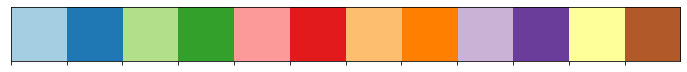

In [26]:
sns.palplot(sns.color_palette("Paired", 12))

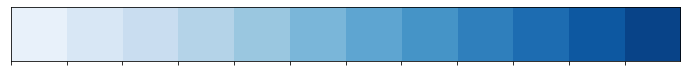

In [27]:
sns.palplot(sns.color_palette("Blues", 12))

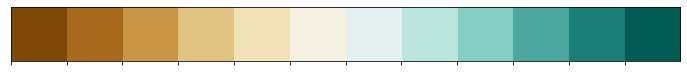

In [28]:
sns.palplot(sns.color_palette("BrBG", 12))

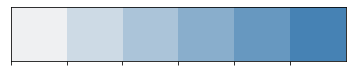

In [29]:
blue_scale = sns.light_palette('steelblue') # using `as_cmap=True` we can use it as cmap.
sns.palplot(blue_scale)

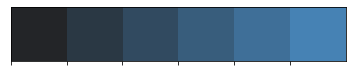

In [30]:
blue_scale = sns.dark_palette('steelblue')
sns.palplot(blue_scale)

#### Diverging pallete
* It is used when we want to treat middle value as a special,  and visualize divergence at left and right of 0.

In [31]:
p = sns.diverging_palette(250,0, as_cmap = True) # we can use it as cmap of heatmap

* We can use matplotlib axes object to customize seaborn plot

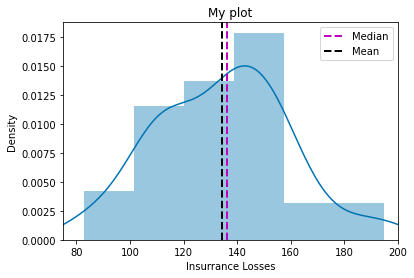

In [32]:
fig, ax = plt.subplots()
sns.distplot(df['insurance_losses'], ax=ax)
ax.set(xlabel='Insurrance Losses', title = 'My plot', xlim=(75,200))
ax.axvline(x=df['insurance_losses'].median(), color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=df['insurance_losses'].mean(), color='k', label='Mean', linestyle='--', linewidth=2)
ax.legend()

### Histogram, KDE and Density

In [33]:
data = np.random.multivariate_normal([0,0], [[5,2], [2,2]], size = 2000)

In [34]:
data = pd.DataFrame(data, columns=['x', 'y'])

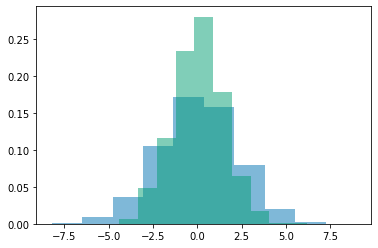

In [35]:
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

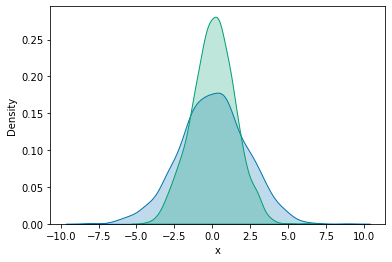

In [36]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

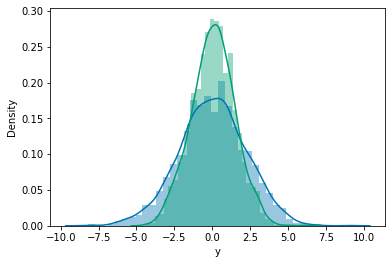

In [37]:
sns.distplot(data['x'])
sns.distplot(data['y']);

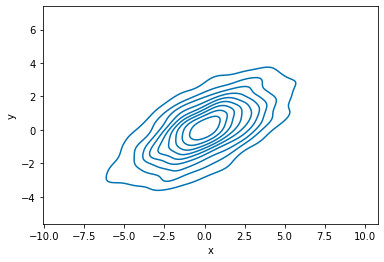

In [38]:
sns.kdeplot(data['x'], data['y']);

## Categorical plot
### stripplot and swarmplot
* Show all individual observation on plot
* strip plot draw value on number line to visualize sample of single random variables
* Swarm plot automatically spread point if it is repeated to give sense of distribution. Instead of randomly jittering points as in a normal scatterplot, points are placed as close to their actual value as possible without allowing any overlap. Use when we have moderate data.

### boxplot, violinplot, lvplot
* Show abstract representation of categorical data

### barplot, pointplot, countplot
* Apply statistical estimation to show a measure of central tendancy and CI.

In [39]:
tips = sns.load_dataset('tips')

* Over plotting : plot created with too many overlapping points
    - Resolve with Sampling, Transparency, Jitter (useful with discrete numerical points)
    - Jitter 0.3 means each value is adjusted upto 0.3 more or 0.3 less.
    - we can also specify `x_jitter` `y_jitter`

<AxesSubplot:ylabel='tip'>

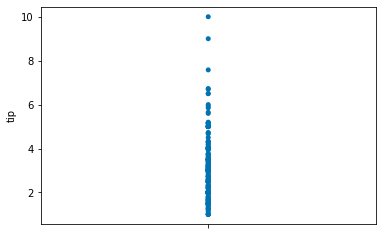

In [40]:
sns.stripplot(y='tip', data=tips, jitter=False)

* when jitter is false all same valued data will be overlapped.

<AxesSubplot:ylabel='tip'>

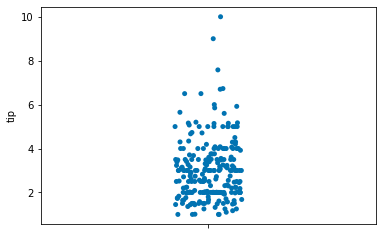

In [41]:
sns.stripplot(y='tip', data=tips) # jitter is True 

* tip data can be grouped according to sex, date, time and we can visualize grouped stripplot

<AxesSubplot:xlabel='day', ylabel='tip'>

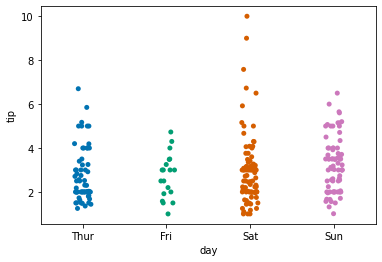

In [42]:
sns.stripplot(x='day', y='tip', data=tips)

<AxesSubplot:xlabel='day', ylabel='tip'>

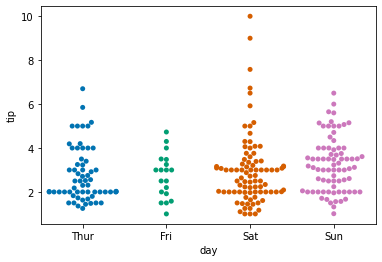

In [43]:
sns.swarmplot(x='day', y='tip', data=tips)

<AxesSubplot:xlabel='day', ylabel='tip'>

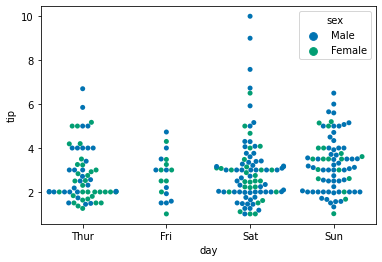

In [44]:
sns.swarmplot(x='day', y='tip', data=tips, hue='sex')

<AxesSubplot:xlabel='tip', ylabel='day'>

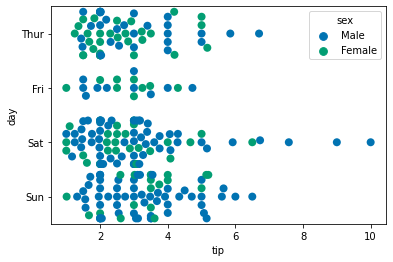

In [45]:
sns.swarmplot(y='day', x='tip', data=tips, hue='sex', size=8, orient='h')

In [46]:
df = pd.read_csv('data/schoolimprovement2010grants.csv')

In [47]:
df.head()

,Unnamed: 0,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West
2,2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,449592,West
3,3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,Transformation,641184,West
4,4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,399686,West


<AxesSubplot:xlabel='Award_Amount', ylabel='Model Selected'>

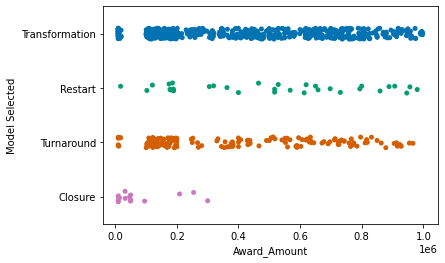

In [48]:
sns.stripplot(data=df, x='Award_Amount', y='Model Selected', jitter=True)

<AxesSubplot:xlabel='Award_Amount', ylabel='Model Selected'>

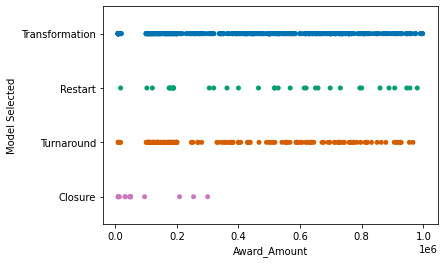

In [49]:
sns.stripplot(data=df, x='Award_Amount', y='Model Selected', jitter=False)

<AxesSubplot:xlabel='Award_Amount', ylabel='Model Selected'>

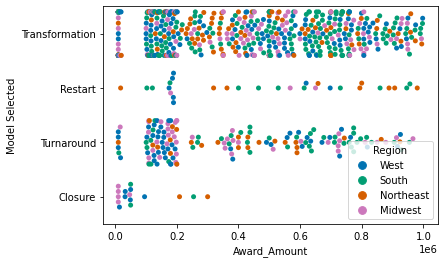

In [50]:
sns.swarmplot(data=df, x='Award_Amount', y='Model Selected', hue='Region')

<AxesSubplot:xlabel='Award_Amount', ylabel='Model Selected'>

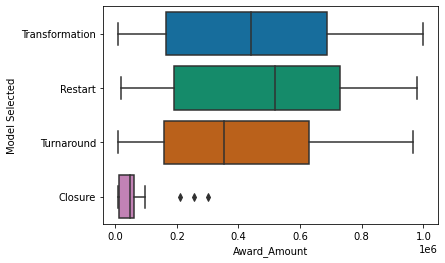

In [51]:
sns.boxplot(data=df, x='Award_Amount', y='Model Selected')

* violinplot is combination of box and kde
* Quantitative vs qualitative. Area depict distribution of points. Wider curve means more data points. Like a smooth histogram or density plot turned on side.

<AxesSubplot:xlabel='Award_Amount', ylabel='Model Selected'>

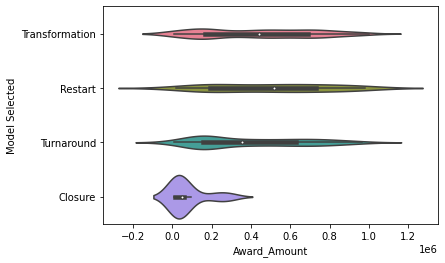

In [52]:
sns.violinplot(data=df, x='Award_Amount', y='Model Selected', palette='husl')

<AxesSubplot:xlabel='Award_Amount', ylabel='Model Selected'>

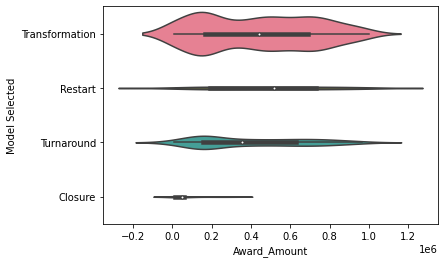

In [53]:
sns.violinplot(data=df, x='Award_Amount', y='Model Selected', palette='husl', scale='count')

<AxesSubplot:xlabel='Award_Amount', ylabel='Model Selected'>

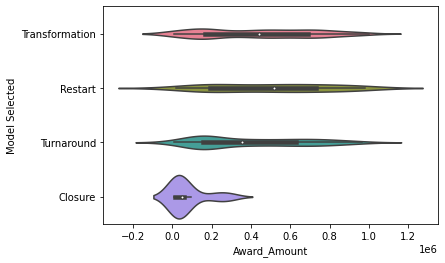

In [54]:
sns.violinplot(data=df, x='Award_Amount', y='Model Selected', palette='husl', scale='area')

<AxesSubplot:xlabel='Award_Amount', ylabel='Model Selected'>

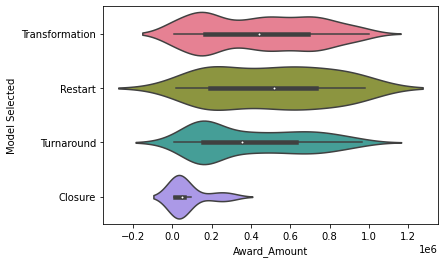

In [55]:
sns.violinplot(data=df, x='Award_Amount', y='Model Selected', palette='husl', scale='width')

* scale is method used to scale width of violin. In count it is scaled by number of observations. If area then each violin has same area. If width than each violin has same width
* For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate
![](images/violin_plot.PNG) 
* The black figure is IQR and white dot is median. `inner='quartile'` only plot quartile as dash lines.
* Violin plot is nice for exploratory analysis, because we can check distributions and a summary stats in one fig. For Explanatory analysis box plot is better.

* In above image, Alpha is bimodal, Beta has highest variance, Gamma is skewed negatively, Delta is skewed positively.

<AxesSubplot:xlabel='tip', ylabel='day'>

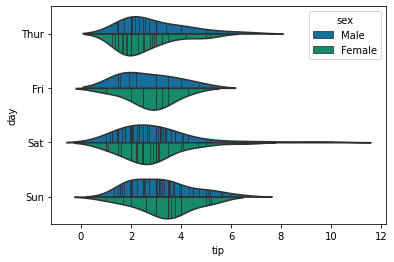

In [56]:
sns.violinplot(y='day', x='tip', data=tips, hue='sex', split=True, inner='stick') # split violing by 2 levels.

<AxesSubplot:xlabel='tip', ylabel='day'>

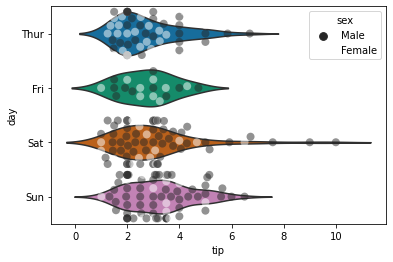

In [57]:
sns.violinplot(y='day', x='tip', data=tips, inner=None) # split violing by 2 levels.
sns.swarmplot(y='day', x='tip', data=tips, hue='sex', size=8, orient='h', color='w', alpha=0.5)

<AxesSubplot:xlabel='Award_Amount', ylabel='Model Selected'>

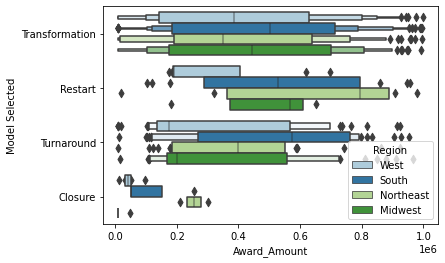

In [58]:
sns.boxenplot(data=df, x='Award_Amount', y='Model Selected', palette='Paired', hue='Region')

<AxesSubplot:xlabel='count', ylabel='Model Selected'>

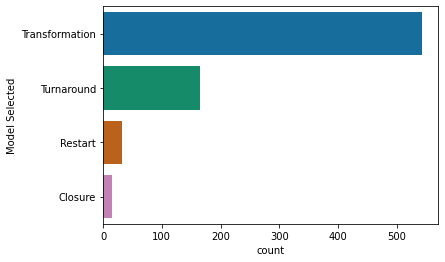

In [59]:
sns.countplot(data=df,
         y="Model Selected", order=df["Model Selected"].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Model Selected'>

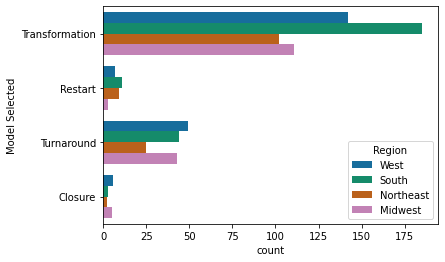

In [60]:
sns.countplot(data=df,
         y="Model Selected",
         hue="Region")

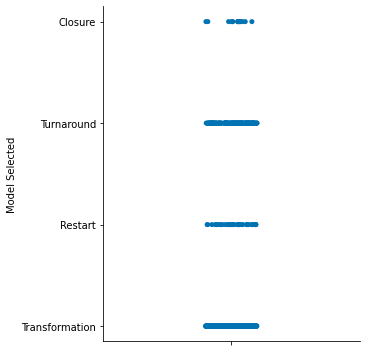

In [61]:
sns.catplot(data=df,
         y="Model Selected")

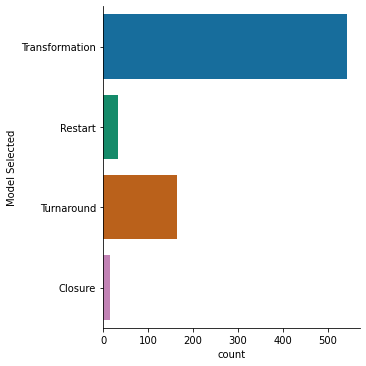

In [62]:
sns.catplot(data=df,
         y="Model Selected", kind='count')

* For nominal categorical variable comparision grouped bar plot is good. For numerical variable comparision use KDE.

<AxesSubplot:xlabel='Model Selected', ylabel='Award_Amount'>

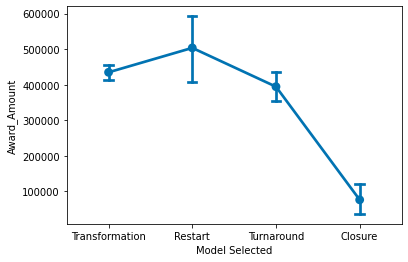

In [63]:
sns.pointplot(data=df,
         y='Award_Amount',
         x='Model Selected',
         capsize=.1) # capsize show confidence interval

* Show mean of quantitative variable, verticle line is 95% CI.
* Encode value of estimate with height on the other axis, but rather than showing a full bar it just plots the point estimates and CI.

<AxesSubplot:xlabel='Model Selected', ylabel='Award_Amount'>

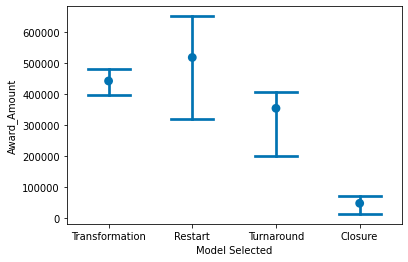

In [64]:
sns.pointplot(data=df,
         y='Award_Amount',
         x='Model Selected',
         capsize=.5, kind="point", join=False, estimator=np.median) 

<AxesSubplot:xlabel='Model Selected', ylabel='Award_Amount'>

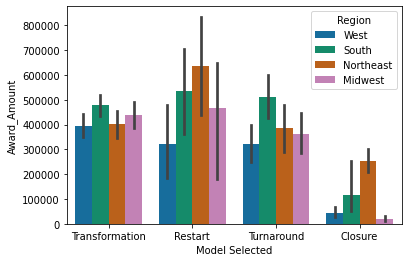

In [65]:
sns.barplot(data=df,
         y='Award_Amount',
         x='Model Selected',
         hue='Region') # we can also define edge color using `edgecolor`

## Regression Plot

In [66]:
df = pd.read_csv('data/bike_share.csv')

In [67]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


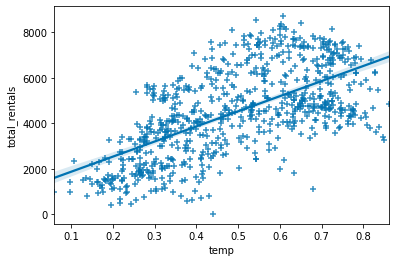

In [68]:
sns.regplot(data=df, x='temp', y='total_rentals', marker='+');

* Looks like there is a positive relationship
* Residual plot is useful to know appropriateness of regression model. It evaluate fit of model.
* Ideally residual values should be plotted randomly across horizontal line
* It shows how much data misses the regression line, horizontal line has residual 0.

<AxesSubplot:xlabel='temp', ylabel='total_rentals'>

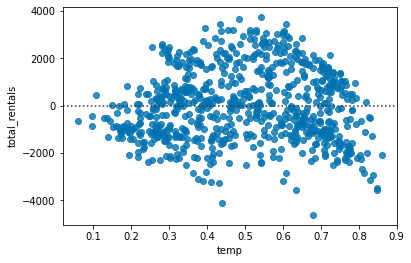

In [69]:
sns.residplot(data=df, x='temp', y='total_rentals')

* Data has slight curve suggesting non linear model might be good.

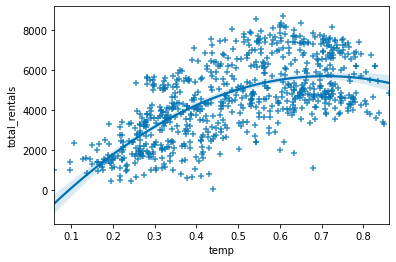

In [70]:
sns.regplot(data=df, x='temp', y='total_rentals', marker='+', order=2);

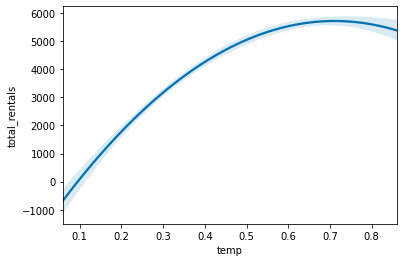

In [71]:
sns.regplot(data=df, x='temp', y='total_rentals', marker='+', order=2, scatter=False);

<AxesSubplot:xlabel='temp', ylabel='total_rentals'>

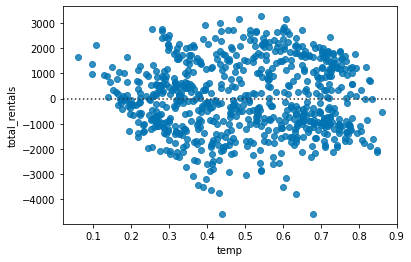

In [72]:
sns.residplot(data=df, x='temp', y='total_rentals', order=2)

* Values randomly distributed so second order polynomial is more appropriate

<AxesSubplot:xlabel='mnth', ylabel='total_rentals'>

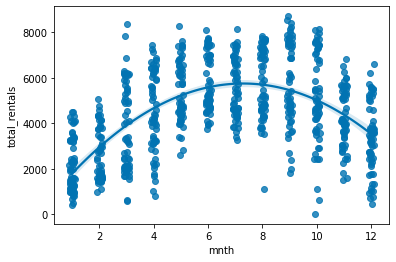

In [73]:
sns.regplot(data=df, x='mnth', y='total_rentals', x_jitter=.1, order=2)

* jitter parameter make it easy to see individual distribution of each month.

<AxesSubplot:xlabel='mnth', ylabel='total_rentals'>

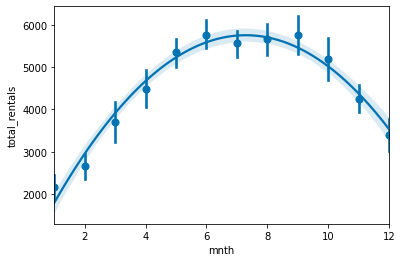

In [74]:
sns.regplot(data=df, x='mnth', y='total_rentals',
            x_estimator=np.mean, order=2)

#### Binning data
* `x_bins` is used to divide data into discrete bins.
* Regression line is still fit against all data

<AxesSubplot:xlabel='temp', ylabel='total_rentals'>

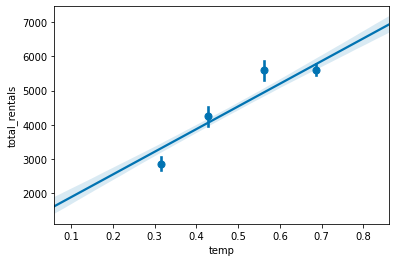

In [75]:
sns.regplot(data=df, x='temp', y='total_rentals', x_bins=4)

<AxesSubplot:xlabel='temp', ylabel='total_rentals'>

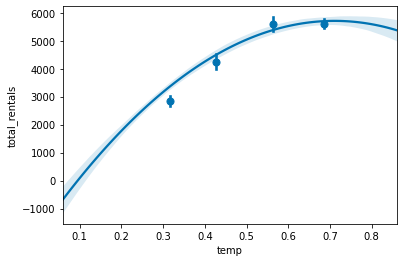

In [76]:
sns.regplot(data=df, x='temp', y='total_rentals', x_bins=4, order=2)

In [77]:
tips = sns.load_dataset('tips')

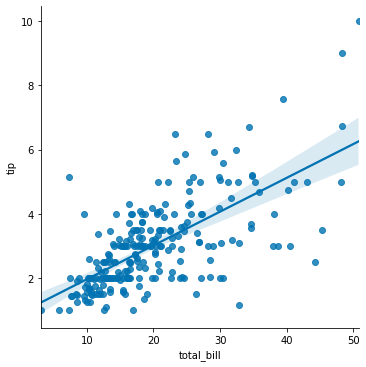

In [78]:
sns.lmplot(data=tips, x='total_bill', y='tip');

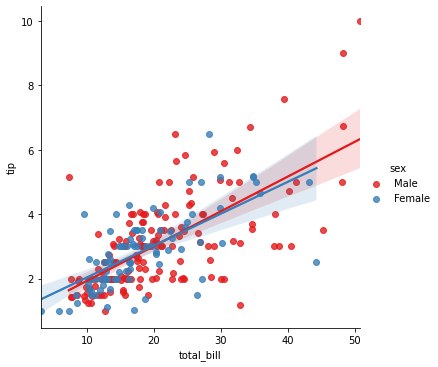

In [79]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue= 'sex', palette='Set1');

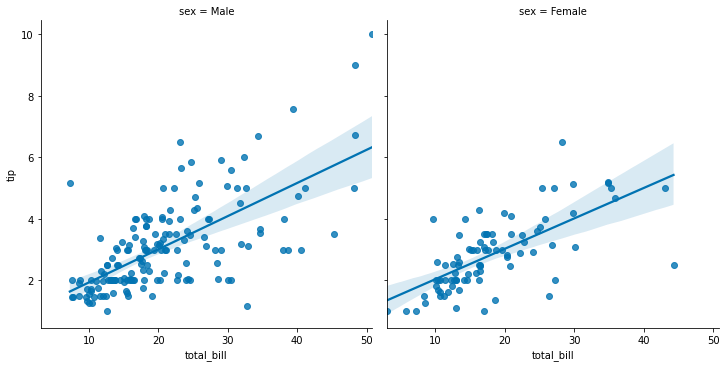

In [80]:
sns.lmplot(data=tips, x='total_bill', y='tip', col= 'sex');

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

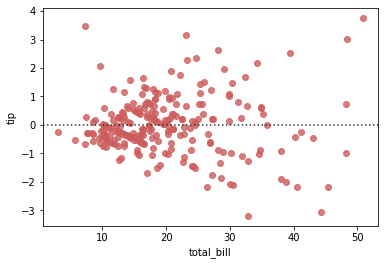

In [81]:
sns.residplot(data=tips, x='total_bill', y='tip', color='indianred')

### Matrix plots
* Heatmap is useful when we have 2 discrete variable
* 'heatmap()' function requires data to be in a grid format
* pandas crosstab() is frequently used to manipulate the data

In [82]:
temp = pd.crosstab(df['mnth'], df['weekday'], values=df['total_rentals'], aggfunc='mean').round(0)

In [83]:
temp

weekday,0,1,2,3,4,5,6
mnth,,,,,,,
1,1816.0,1927.0,2568.0,2139.0,2513.0,2446.0,1957.0
2,2248.0,2604.0,2824.0,2813.0,2878.0,2933.0,2266.0
3,3301.0,3546.0,3574.0,3670.0,3817.0,3926.0,3939.0
4,4417.0,4516.0,4556.0,4331.0,4764.0,4387.0,4446.0
5,5320.0,4512.0,5025.0,5119.0,5893.0,5751.0,5978.0
6,5940.0,5478.0,5681.0,5701.0,5622.0,5616.0,6344.0
7,5298.0,5792.0,5844.0,5814.0,5624.0,5406.0,5232.0
8,4703.0,5518.0,5930.0,6077.0,6038.0,5958.0,5224.0
9,6160.0,5637.0,5184.0,5668.0,5486.0,5747.0,6394.0


<AxesSubplot:xlabel='weekday', ylabel='mnth'>

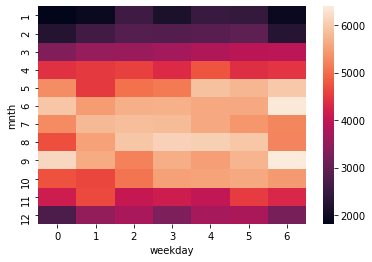

In [84]:
sns.heatmap(temp)

<AxesSubplot:xlabel='weekday', ylabel='mnth'>

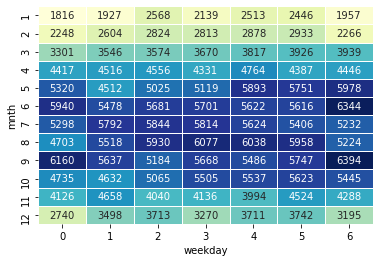

In [85]:
sns.heatmap(temp, annot=True, fmt=".0f", cmap='YlGnBu', cbar=False, linewidths=.5)

### Centering heatmap

<AxesSubplot:xlabel='weekday', ylabel='mnth'>

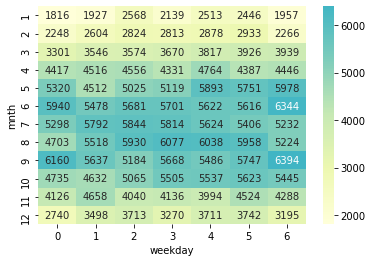

In [86]:
sns.heatmap(temp, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True, 
            center=temp.loc[9, 6])

* Plotting 2 categorical values

```
ct_counts = df.groupby(['cat_var1', 'cat_var2']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'cat_var2', columns = 'cat_var1', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd') # fmt d is annotation will formatted as int. other options are `.0f`
```

### Correlation matrix
* corr function of pandas calculates correlation between columns in dataframe.

<AxesSubplot:xlabel='weekday', ylabel='weekday'>

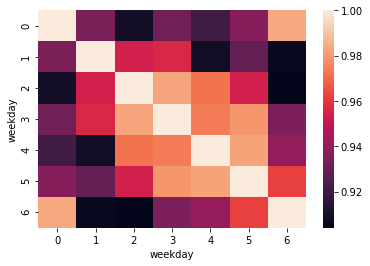

In [87]:
sns.heatmap(temp.corr())

## FacetGrid, factorplot and lmplot
* Compare multiple plot side by side using same axis, its called faceting.
* Data must be in tidy format.
* By default shows pointPlot

### FacetGrid
* The FacetGrid is foundational for many data aware grids
* It allows the user to control how data is distributed across columns, rows and hue
* Once a FacetGrid is created, the plot type must be mapped to the grid

In [88]:
df = pd.read_csv('data/college_datav3.csv')

In [89]:
df.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


In [90]:
df.HIGHDEG.unique()

array([4, 2, 3, 1, 0], dtype=int64)

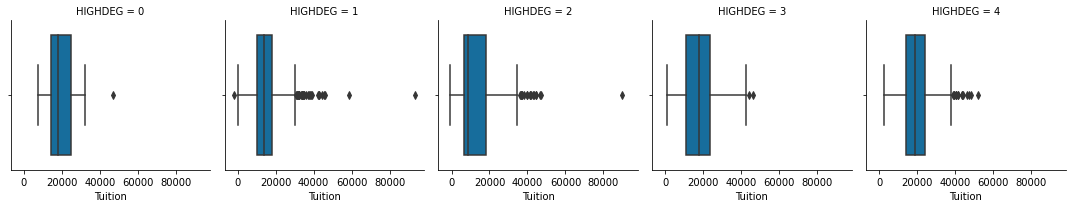

In [91]:
g = sns.FacetGrid(df, col = 'HIGHDEG')
g.map(sns.boxplot, 'Tuition', order=['1','2','3','4'])

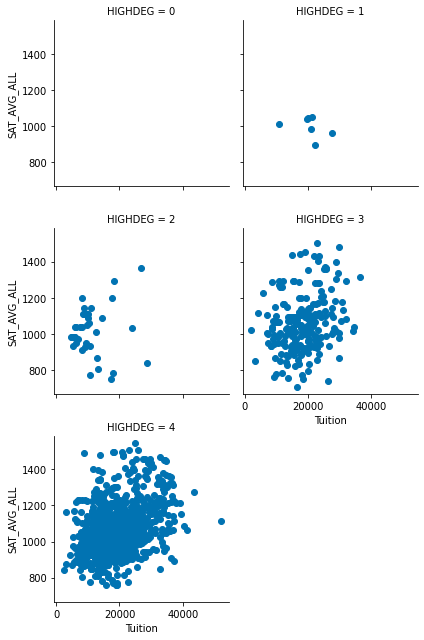

In [92]:
g = sns.FacetGrid(df, col="HIGHDEG",col_wrap=2)
g.map(plt.scatter, 'Tuition', 'SAT_AVG_ALL')

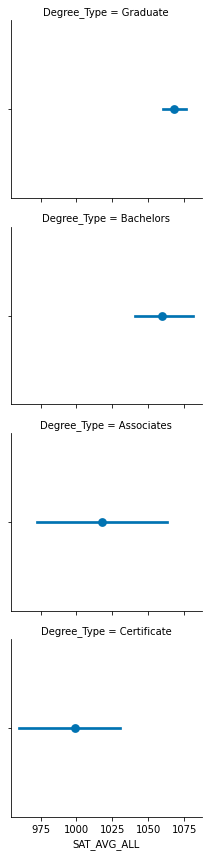

In [93]:
g2 = sns.FacetGrid(df, 
             row="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL');

### factorplot
* Simpler way to use Factorgrid for categorical data
* Combine facetting and mapping process in 1 function.

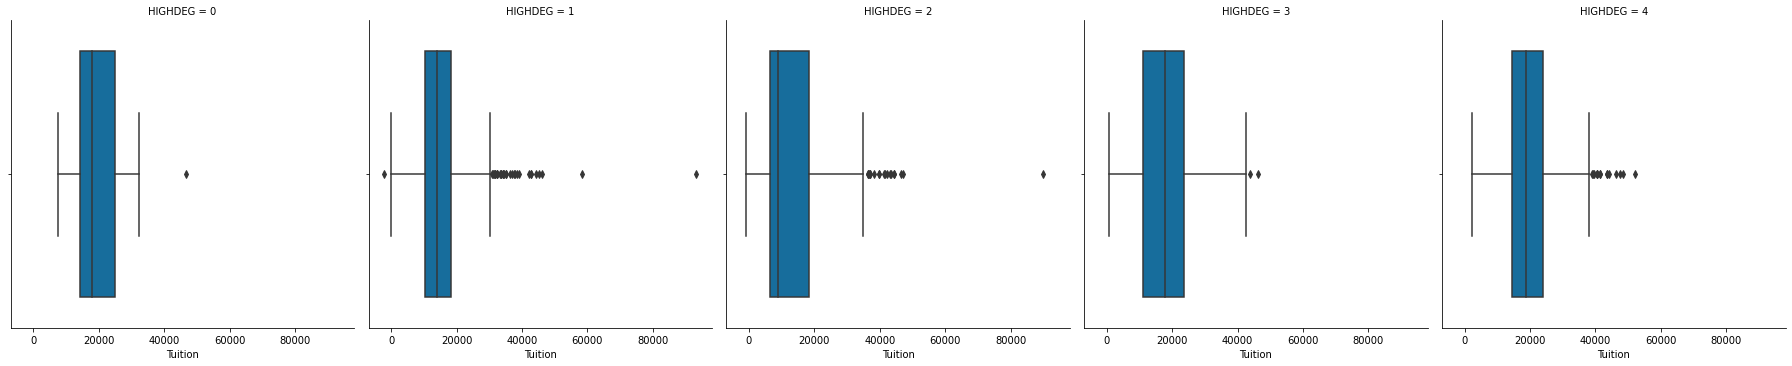

In [94]:
sns.factorplot(x="Tuition", data=df, col="HIGHDEG", kind='box')

### lmpolot

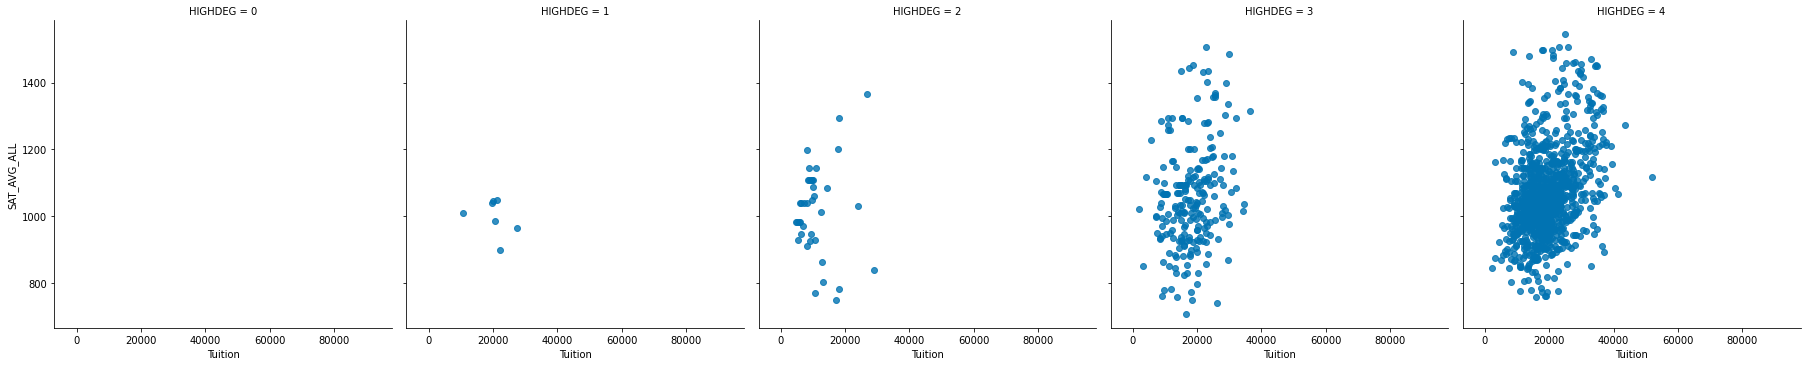

In [95]:
sns.lmplot(data=df, x="Tuition", y="SAT_AVG_ALL",
           col="HIGHDEG", fit_reg=False)

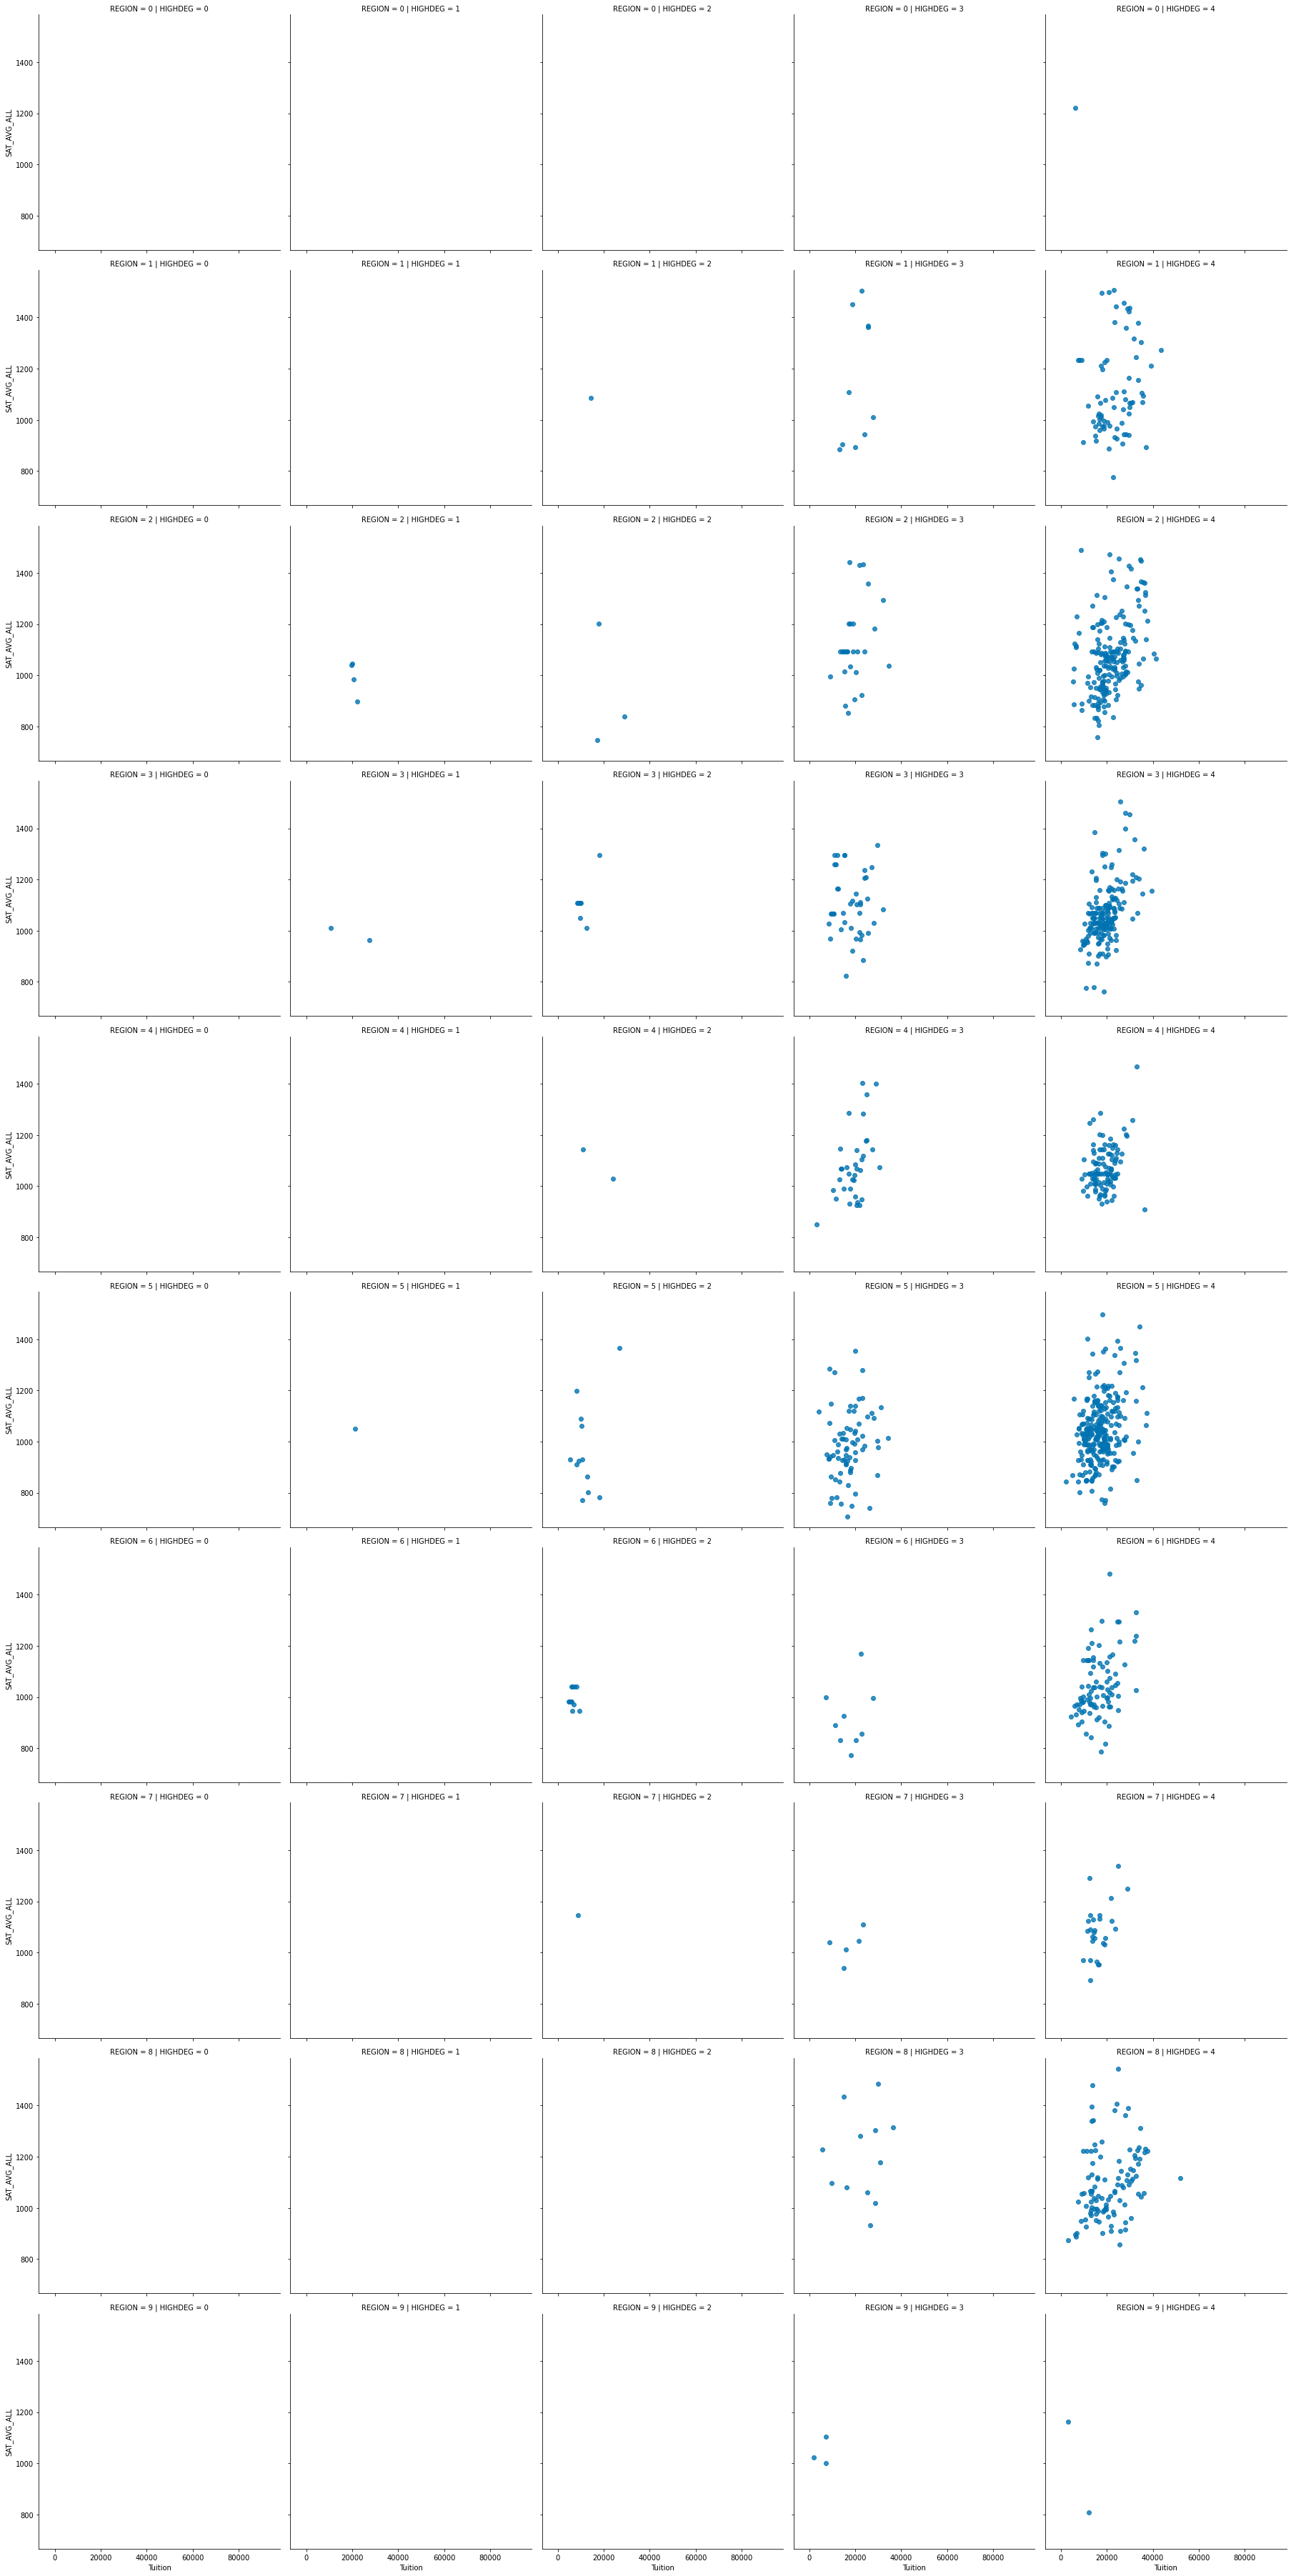

In [96]:
sns.lmplot(data=df, x="Tuition", y="SAT_AVG_ALL",
           col="HIGHDEG", row='REGION',fit_reg=False)

## PairGrid and pairplot
* PairGrid allows to see relationship between 2 data element.

In [97]:
df = pd.read_csv('data/insurance_premiums.csv')

In [98]:
df.head()

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West
3,Arkansas,22.4,18,26,94,95,827.34,142.39,South
4,California,12.0,35,28,91,89,878.41,165.63,West


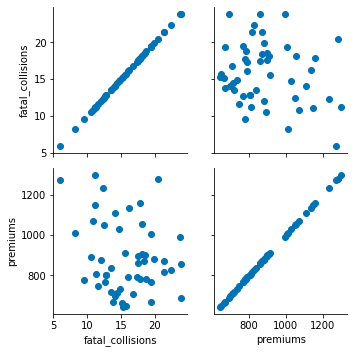

In [99]:
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g = g.map(plt.scatter)

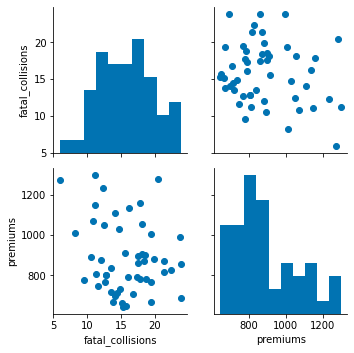

In [100]:
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

In [101]:
iris = sns.load_dataset('iris')

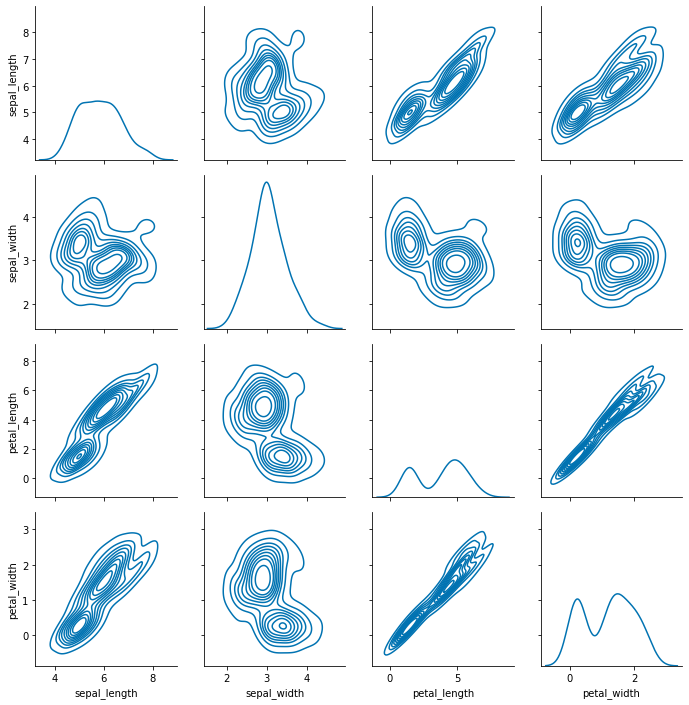

In [102]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot)

### pairplot
* shortcut for PairGrid

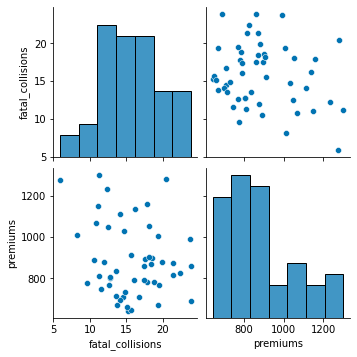

In [103]:
sns.pairplot(df, vars=["fatal_collisions", "premiums"], kind='scatter', diag_kind='hist');

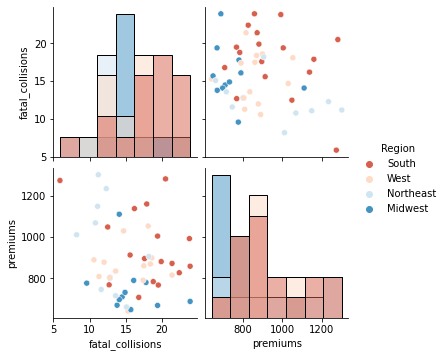

In [104]:
sns.pairplot(df, vars=["fatal_collisions", "premiums"], kind='scatter', diag_kind='hist',
            hue='Region', palette='RdBu', diag_kws={'alpha':.5});

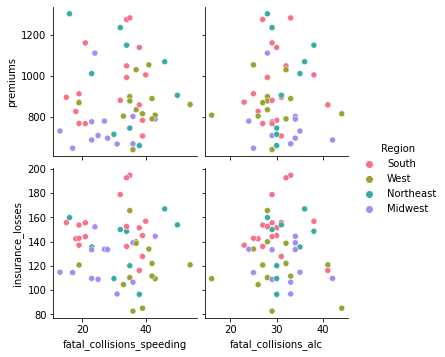

In [105]:
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

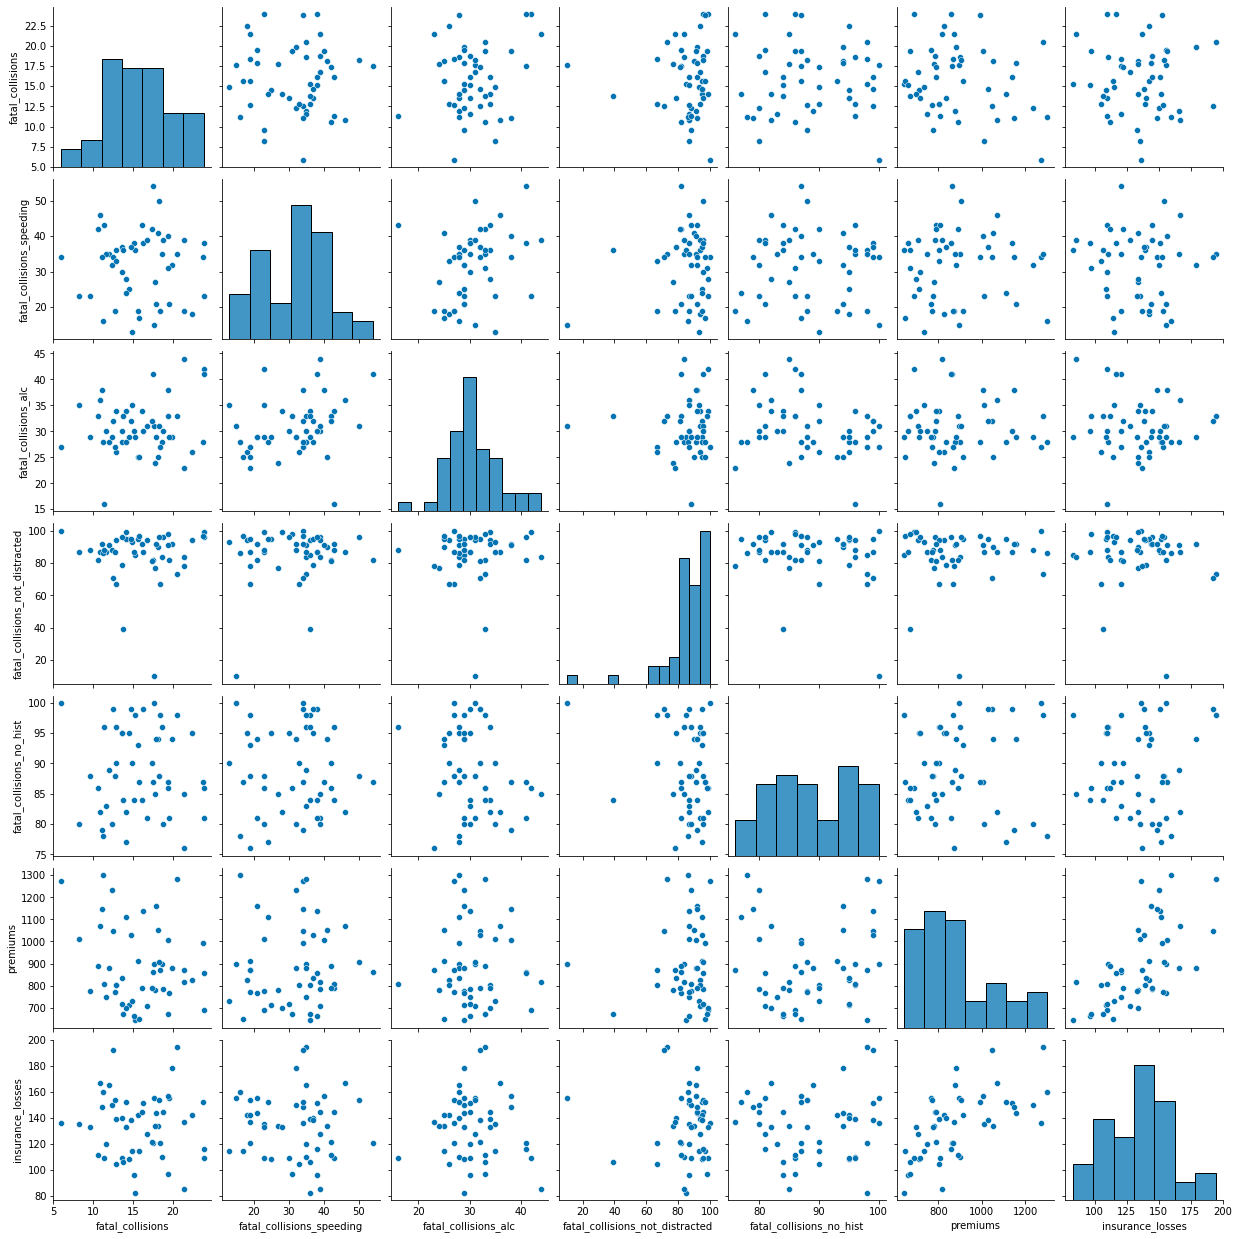

In [106]:
sns.pairplot(df) # show all numerical variable

* pairPlot built on pairGrid.

## JointGrid and jointplot
* JointGrid allows to compare distribution of data between two variables.
* Seaborn's JointGrid combines univariate plots such as histograms, rug plots and kde plots with bivariate plots such as scatter and regression plots. 
* Seaborn's sns.jointplot() provides means of visualizing bivariate distributions. The basic calling syntax is similar to that of sns.lmplot(). By default, calling sns.jointplot(x, y, data) renders a few things:

    - A scatter plot using the specified columns x and y from the DataFrame data.
    - A (univariate) histogram along the top of the scatter plot showing distribution of the column x.
    - A (univariate) histogram along the right of the scatter plot showing distribution of the column y.
* parameter kind to specify how to visualize the joint variation of two continuous random variables (i.e., two columns of a DataFrame)

    - kind='scatter' uses a scatter plot of the data points
    - kind='reg' uses a regression plot (default order 1)
    - kind='resid' uses a residual plot
    - kind='kde' uses a kernel density estimate of the joint distribution
    - kind='hex' uses a hexbin plot of the joint distribution
* A marginal distribution is simply the univariate distribution of a variable, ignoring the values of any other variable.

In [107]:
df = pd.read_csv('data/bike_share.csv')

In [108]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


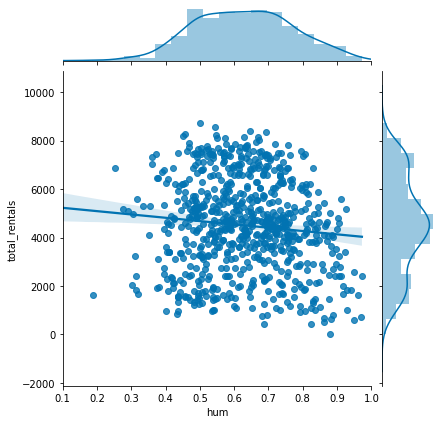

In [109]:
g = sns.JointGrid(x="hum",
            y="total_rentals",
            data=df,
            xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.distplot);

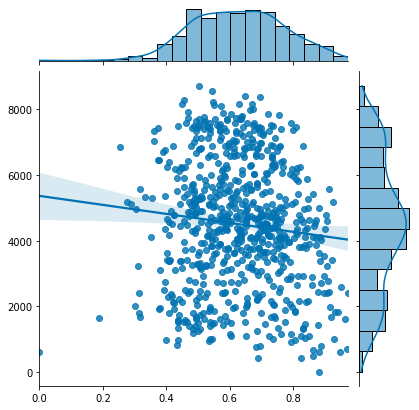

In [110]:
g = sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=df)
g.set_axis_labels("","") # g is jointGrid object

In [111]:
mean, cov = [0,1], [(1,0.5), (0.5, 1)]
x,y = np.random.multivariate_normal(mean,cov, 1000).T

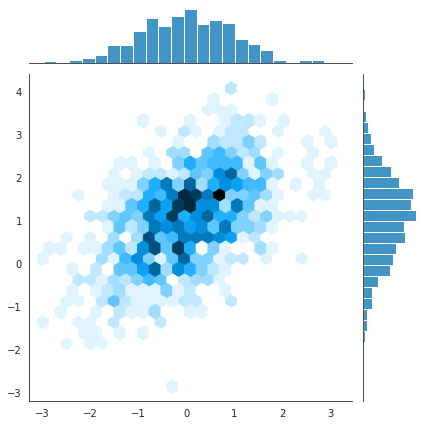

In [112]:
with sns.axes_style('white'):
    sns.jointplot(x,y,kind='hex')

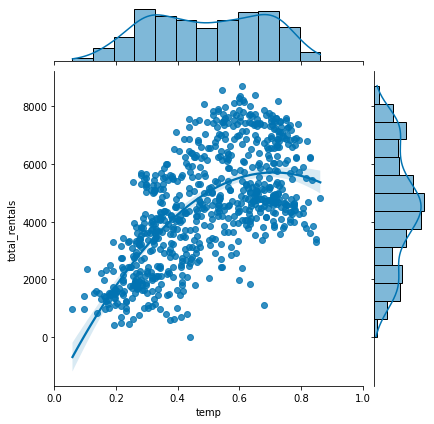

In [113]:
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=df,
         order=2,
         xlim=(0, 1))

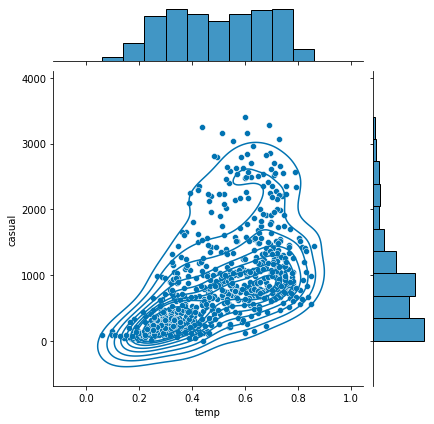

In [114]:
g = (sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

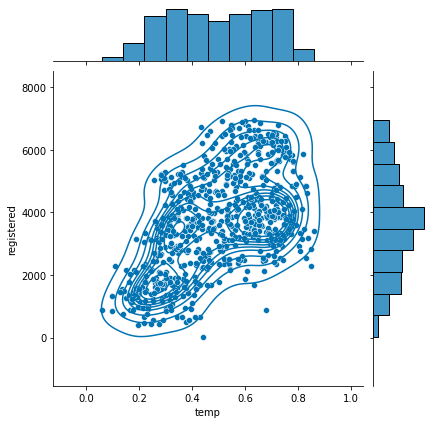

In [115]:
g = (sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot));

* jointplot use jointGrid to manage the figure.

#### Further reading: 

[Seaborn cheatsheet by DataCamp](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)